### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape

(12684, 26)

In [6]:
# check the amount of null values for each row
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**Findings:**
- At first glance, we can observe that the car column has the most missing values.
- We can also see columns like 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50' have smaller degree of missing values.
- While these preliminary numbers are useful, it would be beneficial to view these amount as a percentage of the entire dataset.
    - To do this we first need to calculate the total number of rows.

In [7]:
# total number of rows
total_rows = data.shape[0]

In [8]:
# Calculating the percentage of missing values
data.isnull().sum()/total_rows * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

**Findings:**
- We can see **99%** of the 'car' column consists of null values. As a result, the 'car' column would be a good candidate column to drop. 

3. Decide what to do about your missing data -- drop, replace, other...

- As mentioned previously, the 'car' column can be dropped as 99% of its values are null. 
- Additionally, since the other null values make up a small proportion, I've also decided to drop these null values.

In [9]:
# First, we'll drop the 'car' column
data_cleaned = data.drop('car', axis=1)
data_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [10]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [11]:
# Dropping rows with null values
data_cleaned = data_cleaned.dropna()
data_cleaned

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [12]:
# Number of rows dropped
rows_dropped = data.shape[0] - data_cleaned.shape[0]
rows_dropped

605

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
# Use value_counts(normalize=True) to return proportion of unique values within particular column
acceptance_percentage = data_cleaned['Y'].value_counts(normalize=True)*100
acceptance_percentage

1    56.933521
0    43.066479
Name: Y, dtype: float64

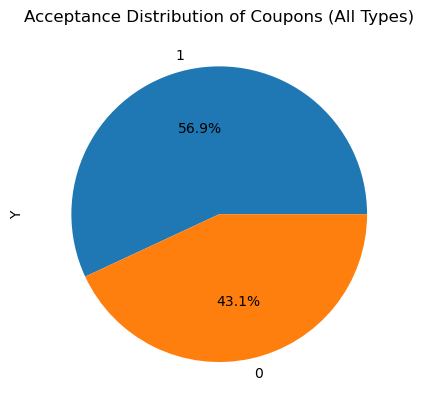

In [14]:
data_cleaned['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Acceptance Distribution of Coupons (All Types)');

**Findings:**
- 56.9% of the driver accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

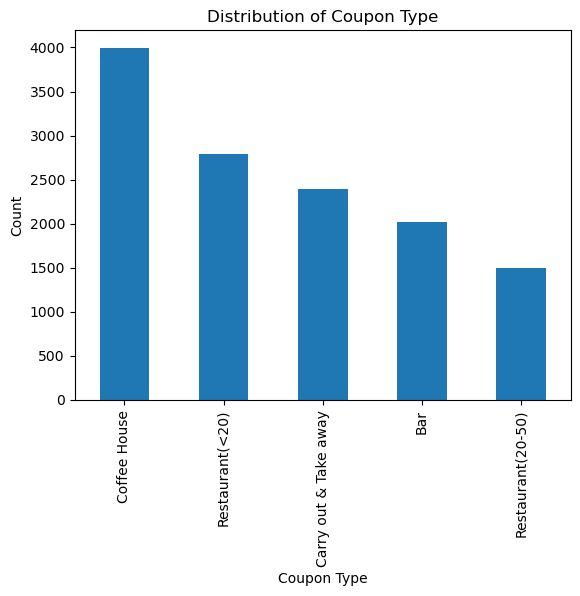

In [15]:
# Create dataframe with just 'coupon' column
coupon_distribution = data['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupon Type')
plt.xlabel("Coupon Type")
plt.ylabel('Count')

coupon_distribution;

6. Use a histogram to visualize the temperature column.

In [16]:
# Checking distribution of temperature
temperature_distribution = data_cleaned['temperature'].value_counts()
temperature_distribution

80    6222
55    3662
30    2195
Name: temperature, dtype: int64

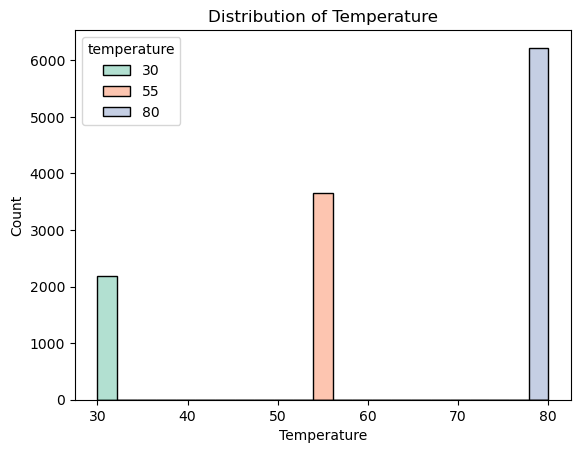

In [17]:
# Histrogram using seaborn
sns.histplot(data = data_cleaned, x = 'temperature', hue = 'temperature', palette='Set2')
plt.xlabel("Temperature")
plt.title("Distribution of Temperature");

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
# Checking all values for coupon column in original dataframe
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [19]:
# bar_df = data[data['coupon'] == 'Bar']
bar_coupon_df = data_cleaned.query('coupon == "Bar"')

In [20]:
bar_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [21]:
bar_coupon_df['coupon'].unique()

array(['Bar'], dtype=object)

2. What proportion of bar coupons were accepted?


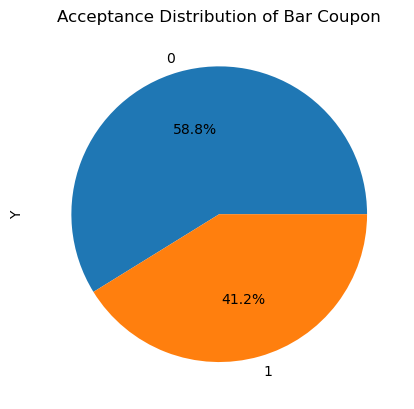

In [22]:
bar_coupon_df['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Acceptance Distribution of Bar Coupon");

In [23]:
bar_acceptance_percentage = bar_coupon_df['Y'].value_counts(normalize=True)*100
bar_acceptance_percentage

0    58.808155
1    41.191845
Name: Y, dtype: float64

In [24]:
# Visualizing distribution with Pie Chart
#fig = px.pie(names = bar_acceptance_percentage.index, values = bar_acceptance_percentage.values, title = "Acceptance Distribution of Bar Coupon")
#fig.show()

**Findings:**
- If we now only consider bar coupons, we can see that only 41.2% of drivers accept the coupon.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
bar_coupon_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [26]:
bar_coupon_df['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [27]:
# Dividing 'Bar' column into two subsets based on number of bar visits. Define subsets as infrequent and frequent. 

infrequent = ['never', 'less1', '1~3']
frequent = ['4~8', 'gt8']

In [28]:
# Next, create two sub-dataframes each corresponding to each respective subset (infrequent and frequent)

bar_coupon_infrequent = bar_coupon_df.query('Bar in @infrequent')
bar_coupon_infrequent['Bar'].value_counts()

never    788
less1    553
1~3      379
Name: Bar, dtype: int64

In [29]:
bar_coupon_frequent = bar_coupon_df.query('Bar in @frequent')
bar_coupon_frequent['Bar'].value_counts()

4~8    147
gt8     46
Name: Bar, dtype: int64

Calculating the acceptance for each sub-dataframe

In [30]:
# Acceptance Rate for infrequent bar visit
bar_infrequent_acceptance = bar_coupon_infrequent['Y'].sum()
bar_infrequent_total = bar_coupon_infrequent.shape[0]

bar_infrequent_acceptance_rate = bar_infrequent_acceptance / bar_infrequent_total * 100

In [31]:
# Printing results
print(bar_infrequent_acceptance_rate)

37.26744186046512


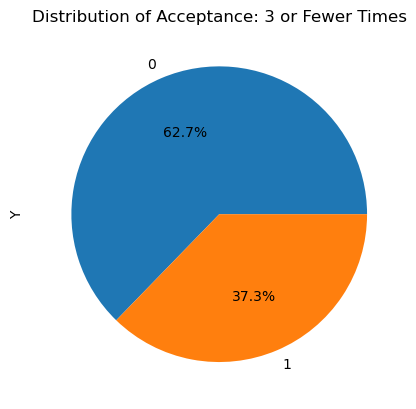

In [32]:
# Alternatively, we can arrive at the same acceptance rate using value_counts and visualize with pie chart
bar_coupon_infrequent['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: 3 or Fewer Times');

In [33]:
# Acceptance rate for frequent bar visits
bar_frequent_acceptance = bar_coupon_frequent['Y'].sum()
bar_frequent_total = bar_coupon_frequent.shape[0]

bar_frequent_acceptance_rate = bar_frequent_acceptance / bar_frequent_total * 100

In [34]:
print(bar_frequent_acceptance_rate)

76.16580310880829


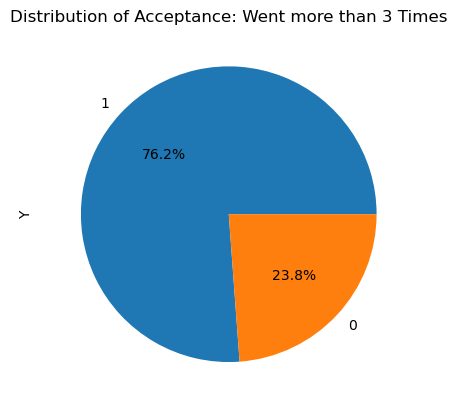

In [35]:
# Alternatively, we can arrive at the same acceptance rate using value_counts and visualize with pie chart
bar_coupon_frequent['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: Went more than 3 Times');

**Findings:**
- Acceptance rate for those who went to bar 3 or fewer times a month is approximately **37.3%**
- Acceptance rate for those who went more than 3 times is approximately **76.2%** 
- Based on these acceptance rates, we can conclude that **drivers who visit bars more than 3 times a month are more likely to use the bar coupon.**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [36]:
bar_coupon_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [37]:
bar_coupon_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [38]:
# go to bar more than once a month
condition1 = ['1~3', 'gt8', '4~8']

# over the age of 25
condition2 = ['46', '26', '31', '41', '50plus', '36']

In [39]:
# Creating df with conditions above

filtered_by_condition = bar_coupon_df.query('Bar in @condition1 and age in @condition2')

In [40]:
# Ensure filtered dataframe have correct values in both Bar and age columns
filtered_by_condition['Bar'].value_counts()

1~3    270
4~8    103
gt8     30
Name: Bar, dtype: int64

In [41]:
filtered_by_condition['age'].value_counts()

26        159
31         93
50plus     63
36         40
41         32
46         16
Name: age, dtype: int64

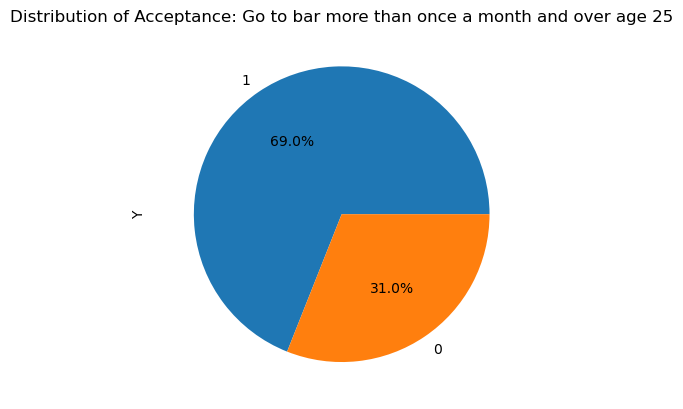

In [42]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_by_condition['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: Go to bar more than once a month and over age 25');

In [43]:
# Repeating the same process for the acceptance rate of all others

rest_by_condition = bar_coupon_df.query('Bar not in @condition1 and age not in @condition2')

In [44]:
# Ensure filtered dataframe have correct values in both Bar and age columns
rest_by_condition['Bar'].value_counts()

never    193
less1    116
Name: Bar, dtype: int64

In [45]:
rest_by_condition['age'].value_counts()

21         238
below21     71
Name: age, dtype: int64

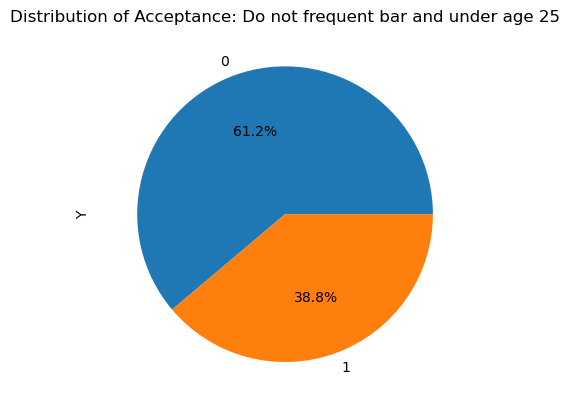

In [46]:
# Calculate and Visualize Acceptance Rate using Pie Chart
rest_by_condition['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: Do not frequent bar and under age 25');

**Findings:**
- Acceptance rate for those who go to a bar more than once a month and are over the age of 25 is **69%**
- Acceptance rate for all others is **38.8%** 
- Based on these acceptance rates, we can see there is a **significant difference between the acceptance rates between these two groups.**
    - Drivers who go to bar more than once a month and are over the age of 25 accepted coupon far more.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [47]:
bar_coupon_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [48]:
bar_coupon_df['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [49]:
bar_coupon_df['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [50]:
# creating list of relevant conditions

# drivers who go to bars more than once a month
condition_1 = ['1~3', 'gt8', '4~8']

# passengers that were not a kid
condition_2 = ['Friend(s)', 'Alone', 'Partner']

# occupations other than farming, fishing, or forestry
condition_3 = ['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       ]

In [51]:
# Creating df with conditions above

filtered_df = bar_coupon_df.query('Bar in @condition_1 and passanger in @condition_2 and occupation in @condition_3')

In [52]:
filtered_df['Bar'].value_counts()

1~3    345
4~8    140
gt8     45
Name: Bar, dtype: int64

In [53]:
filtered_df['passanger'].value_counts()

Alone        341
Friend(s)    116
Partner       73
Name: passanger, dtype: int64

In [54]:
filtered_df['occupation'].value_counts()

Unemployed                                   71
Student                                      64
Sales & Related                              61
Computer & Mathematical                      47
Management                                   43
Office & Administrative Support              39
Business & Financial                         25
Arts Design Entertainment Sports & Media     22
Education&Training&Library                   20
Legal                                        17
Food Preparation & Serving Related           14
Healthcare Practitioners & Technical         14
Protective Service                           14
Transportation & Material Moving             13
Healthcare Support                           11
Production Occupations                       10
Installation Maintenance & Repair             9
Personal Care & Service                       8
Construction & Extraction                     7
Architecture & Engineering                    6
Community & Social Services             

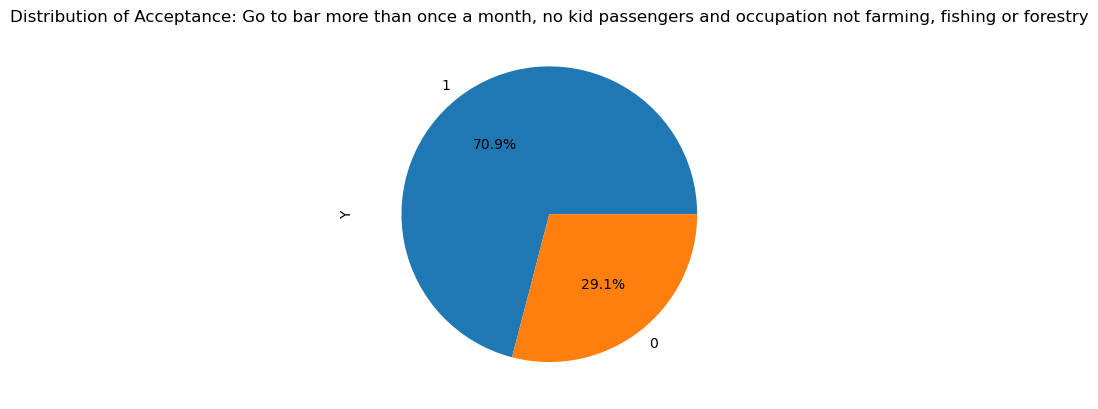

In [55]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_df['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: Go to bar more than once a month, no kid passengers and occupation not farming, fishing or forestry');

**Findings:**
- Acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is **70.9%**.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [56]:
bar_coupon_df['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [57]:
# Creating df for the condition: "go to bars more than once a month, had passengers that were not a kid, and were not widowed"

# drivers who go to bars more than once a month
condition_a = ['1~3', 'gt8', '4~8']

# passengers that were not a kid
condition_b = ['Friend(s)', 'Alone', 'Partner']

# not widowed
condition_c = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']

In [58]:
# Creating df with conditions above

filtered_6a = bar_coupon_df.query('Bar in @condition_a and passanger in @condition_b and maritalStatus in @condition_c')

In [59]:
filtered_6a['Bar'].value_counts()

1~3    345
4~8    140
gt8     45
Name: Bar, dtype: int64

In [60]:
filtered_6a['passanger'].value_counts()

Alone        341
Friend(s)    116
Partner       73
Name: passanger, dtype: int64

In [61]:
filtered_6a['maritalStatus'].value_counts()

Single               267
Married partner      128
Unmarried partner    122
Divorced              13
Name: maritalStatus, dtype: int64

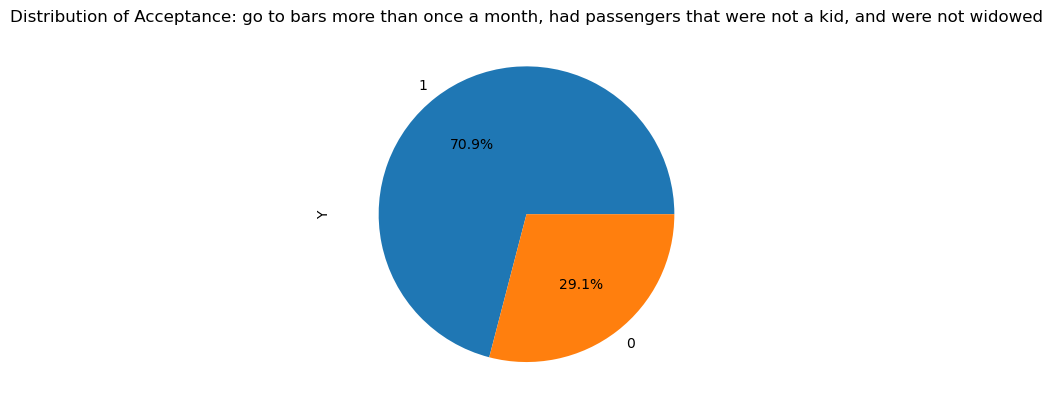

In [62]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_6a['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: go to bars more than once a month, had passengers that were not a kid, and were not widowed');

**Findings:**
- Acceptance rate for those go to bars more than once a month, had passengers that were not a kid, and were not widowed is **70.9%**. 
- This acceptance rate is the same as the acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [63]:
bar_coupon_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [64]:
# Creating df for the condition: go to bars more than once a month and are under the age of 30

# drivers who go to bars more than once a month
condition_a = ['1~3', 'gt8', '4~8']

# under the age of 30
condition_d = ['21','26','below21']

In [65]:
# Creating df with conditions above

filtered_6b = bar_coupon_df.query('Bar in @condition_a and age in @condition_d')

In [66]:
filtered_6b['Bar'].value_counts()

1~3    198
4~8     96
gt8     34
Name: Bar, dtype: int64

In [67]:
filtered_6b['age'].value_counts()

21         159
26         159
below21     10
Name: age, dtype: int64

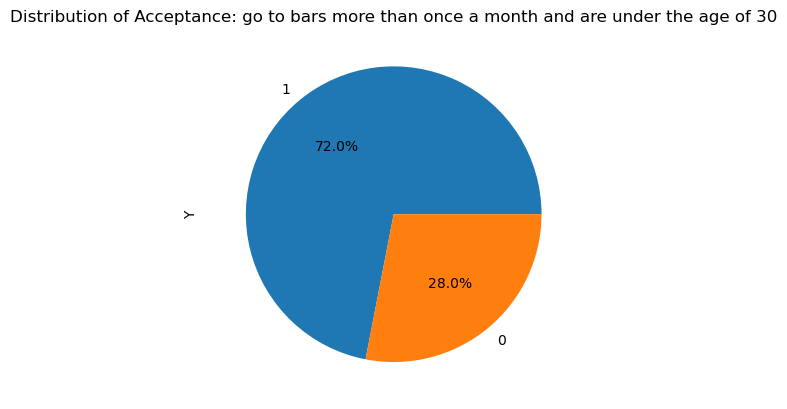

In [68]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_6b['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: go to bars more than once a month and are under the age of 30');

**Findings:**
- Acceptance rate for those who go to bars more than once a month and are under the age of 30 is **72%**.
- This acceptance rate just a tad bit higher than the previous condition that was explored.

In [69]:
bar_coupon_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [70]:
sorted(bar_coupon_df['income'].unique())

['$100000 or More',
 '$12500 - $24999',
 '$25000 - $37499',
 '$37500 - $49999',
 '$50000 - $62499',
 '$62500 - $74999',
 '$75000 - $87499',
 '$87500 - $99999',
 'Less than $12500']

In [71]:
# Creating df for the condition: go to cheap restaurants more than 4 times a month and income is less than 50K. 

# go to cheap restaurants more than 4 times a month
condition_e = ['4~8','gt8']

# income is less than 50K
condition_f = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

In [72]:
# Creating df with conditions above

filtered_6c = bar_coupon_df.query('RestaurantLessThan20 in @condition_e and income in @condition_f')

In [73]:
filtered_6c['RestaurantLessThan20'].value_counts()

4~8    237
gt8     96
Name: RestaurantLessThan20, dtype: int64

In [74]:
filtered_6c['income'].value_counts()

$12500 - $24999     96
$37500 - $49999     90
$25000 - $37499     74
Less than $12500    73
Name: income, dtype: int64

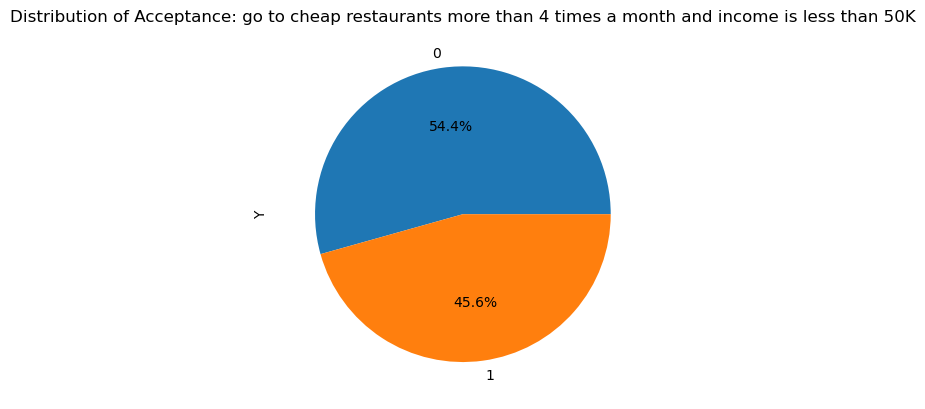

In [75]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_6c['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: go to cheap restaurants more than 4 times a month and income is less than 50K');

**Findings:**
- Acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K is **45.6%**.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
- Based on these observations, I hypothesize that drivers have the following characteristics:
    - they are within the age range: 25 - 30
    - frequent the bar more than once a month
    - do not have passengers that were kids
    - not widowed
    - do not have occupation in farming, fishing and forestry
    - have income greater than 50K

- Drivers who have kids may prefer to spend time with family instead of going to the bar. Additionally, occupation in farming, fishing and forestry may not have many social gatherings compared to other occupations. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [76]:
# Checking other coupons available to explore
data_cleaned['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

As we saw from earlier, among the coupon types, most of the coupons were Coffee House. Therefore, I have decided to explore Coffee House Coupon. First, I will create a new dataframe that contains just Coffee House coupon.

In [77]:
# Creating dataframe with just Coffee House coupon from data_cleaned
coffee_coupon_df = data_cleaned.query('coupon == "Coffee House"')

In [78]:
coffee_coupon_df['coupon'].value_counts()

Coffee House    3816
Name: coupon, dtype: int64

In [79]:
# Checking the distribution for coupon acceptance to identify if there is a class imbalance
coffee_acceptance_percentage = coffee_coupon_df['Y'].value_counts(normalize=True)*100
coffee_acceptance_percentage

0    50.366876
1    49.633124
Name: Y, dtype: float64

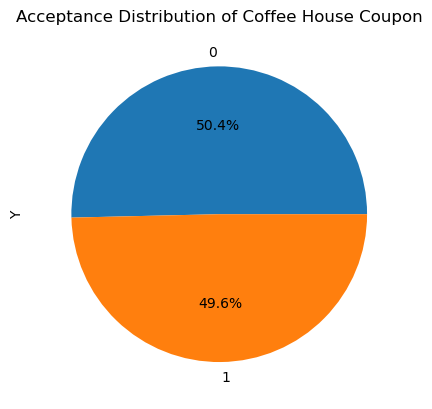

In [80]:
coffee_coupon_df['Y'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Acceptance Distribution of Coffee House Coupon');

**Findings:**
- Distribution is approximately **evenly split (no class imbalance).**

### Part 1: Exploring relationship between Contextual Attributes and Coffee coupon accceptance
- Weather
- Passenger
- Driving destination

**1. Exploring how weather influences whether drivers accept Coffee coupon**

In [81]:
# Checking the different weather conditions
coffee_coupon_df['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [82]:
coffee_coupon_df['weather'].value_counts()

Sunny    3316
Snowy     285
Rainy     215
Name: weather, dtype: int64

**Findings:**
- There is a huge class imbalance.
- Was originally planning to sum the amount of coupon acceptance per weather type but the result would be skewed as there are way more samples with Sunny weather.
- Instead, I will look at the acceptance distribution for each weather type.

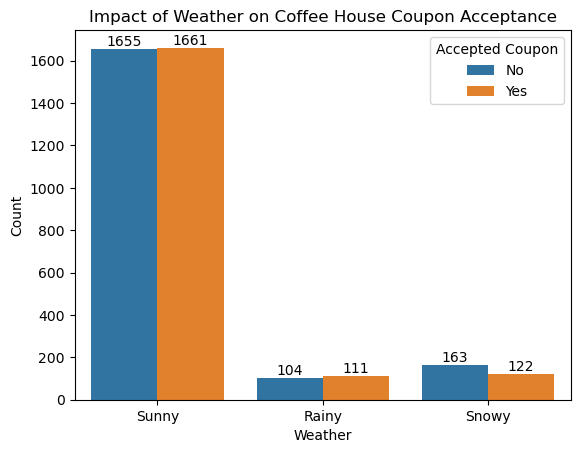

In [83]:
# Using seaborn to plot a countplot and splitting the data by coupon acceptance
weather_plot = sns.countplot(data = coffee_coupon_df, x = 'weather', hue ='Y')
plt.xlabel("Weather")
plt.ylabel("Count")
plt.title("Impact of Weather on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

for container in weather_plot.containers:
    weather_plot.bar_label(container)

Before continuing any further, I will create a new column called 'Acceptance' which takes on the same values as those in column 'Y' but replaces No for 0 and Yes for 1.

In [84]:
# Renaming the values in 'Y' so that the legend label is meaningful
# 0 -> No and 1 -> Yes

rename_values = {0: 'No', 1 : 'Yes'}

# Received a SettingWithCopyWarning so have to make a copy of df
coffee_coupon_df_copy = coffee_coupon_df.copy()

# Use map function to rename numerical values to strings
coffee_coupon_df_copy['Acceptance'] = coffee_coupon_df_copy['Y'].map(rename_values)

In [85]:
# New column 'Acceptance' successfully added with renamed values No and Yes
coffee_coupon_df_copy

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Acceptance
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,No
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,No
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,4~8,gt8,less1,1,1,0,0,1,0,No
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,4~8,gt8,less1,1,0,0,1,0,0,No
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,No
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,No


**Findings:**
- Acceptance ratio is approximately equivalent across different types of weather. **This suggests that weather doesn't influence whether a driver accepts the Coffee House Coupon.** 
- Note: While both the seaborn graph and plotly graph convey the same information, I personally prefer the latter. Thus, I will be using plotly for the remainder of the data visualization.

**2. Evaluating how type of passenger influences coupon acceptance.**

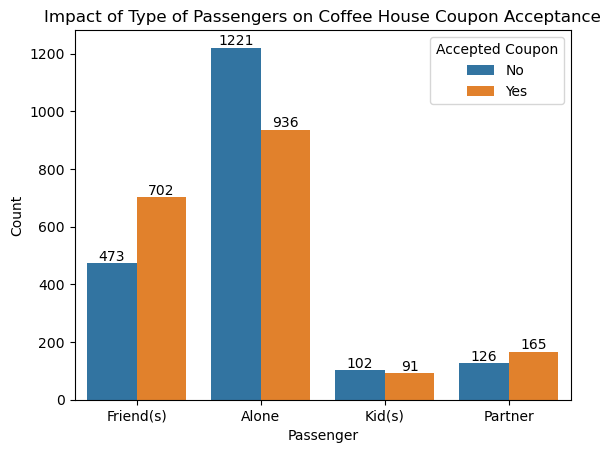

In [86]:
passenger_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'passanger', hue ='Acceptance')
plt.xlabel("Passenger")
plt.ylabel("Count")
plt.title("Impact of Type of Passengers on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# label count for each column
for container in passenger_plot.containers:
    passenger_plot.bar_label(container)

**Findings:**
- Drivers with **Friends and Partner** displayed tendency to **accept the coffee house coupon.**
- On the contrary, drivers who were **alone were more likely to reject the coupon.**

**3. Evaluating driving destination to coupon acceptance.**

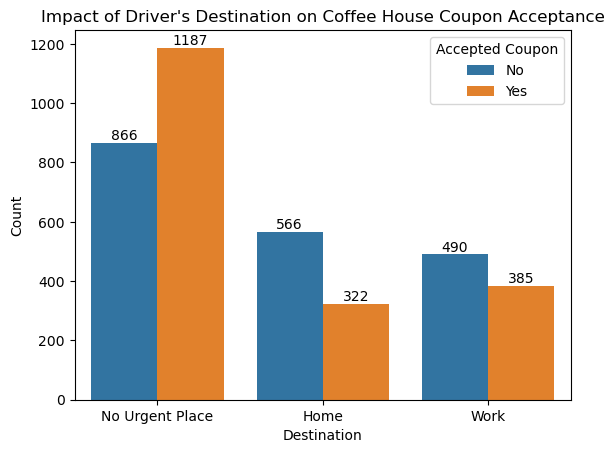

In [87]:
destination_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'destination', hue ='Acceptance')
plt.xlabel("Destination")
plt.ylabel("Count")
plt.title("Impact of Driver's Destination on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
for container in destination_plot.containers:
    destination_plot.bar_label(container)

**Findings:**
- Drivers with **no urgent place to go were more likely to accept the coupon.**
- On the other hand, drivers who were driving home or work tend to reject the coupon.

### Part 2: Exploring relationship between User Attributes to Coffee coupon accceptance
- Gender
- Age
- Marital Status
- Number of Children
- Annual Income
- Time
- Number of times go to Coffee House 
- Occupation

**1. Exploring Gender and coupon acceptance.**

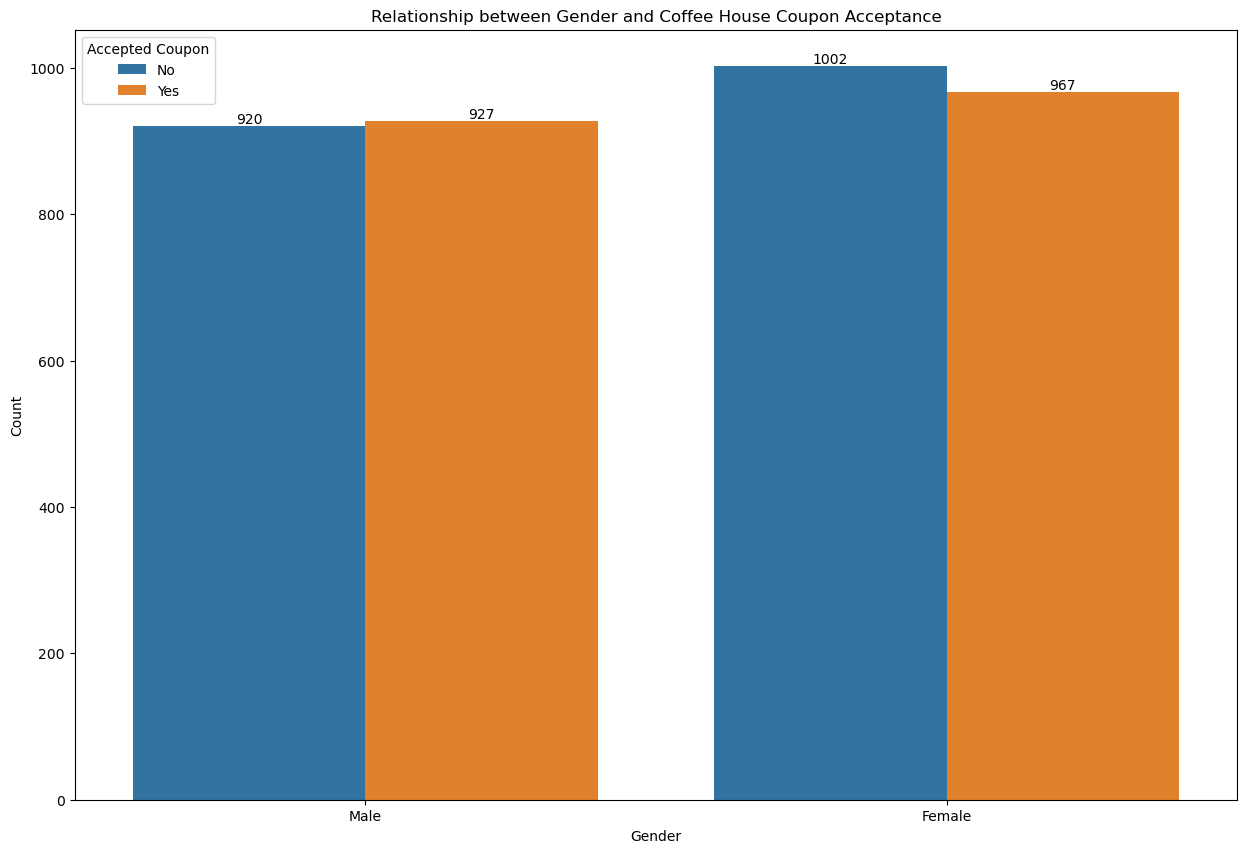

In [88]:
plt.figure(figsize=(15, 10))
gender_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'gender', hue ='Acceptance')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Relationship between Gender and Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
for container in gender_plot.containers:
    gender_plot.bar_label(container)

**Finding:**
- The results suggest that Gender does not influence whether a driver accepts the coupon or not.

**2. Exploring how driver's age influence acceptance of Coffee House coupon.**

In [89]:
coffee_coupon_df_copy['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [90]:
# Want the graph to display the different age groupings in ascending order
sorted_order = ['below21','21','26','31','36','41','46','50plus']

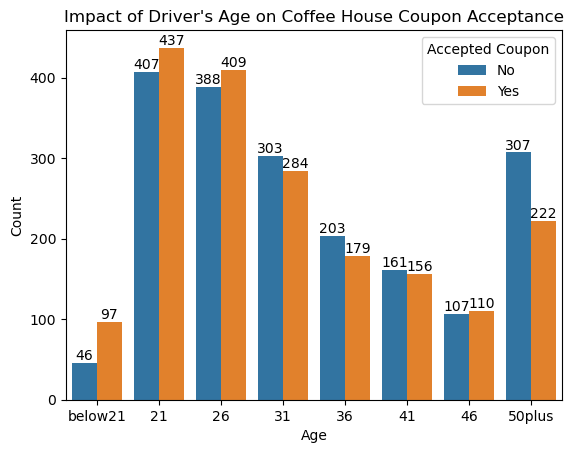

In [91]:
age_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'age', hue ='Acceptance', order = sorted_order)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Impact of Driver's Age on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in age_plot.containers:
    age_plot.bar_label(container)

**Findings:**
- Drivers who are in the following age groups: **below 21, 21 and 26 were more likely to accept the Coffee House coupons compared to the rest of the age groups.**
- The remaining age groups tend to not accept the coupon (exception age group 46)

**3. Exploring how Marital Status influences acceptance of Coffee House coupon.**

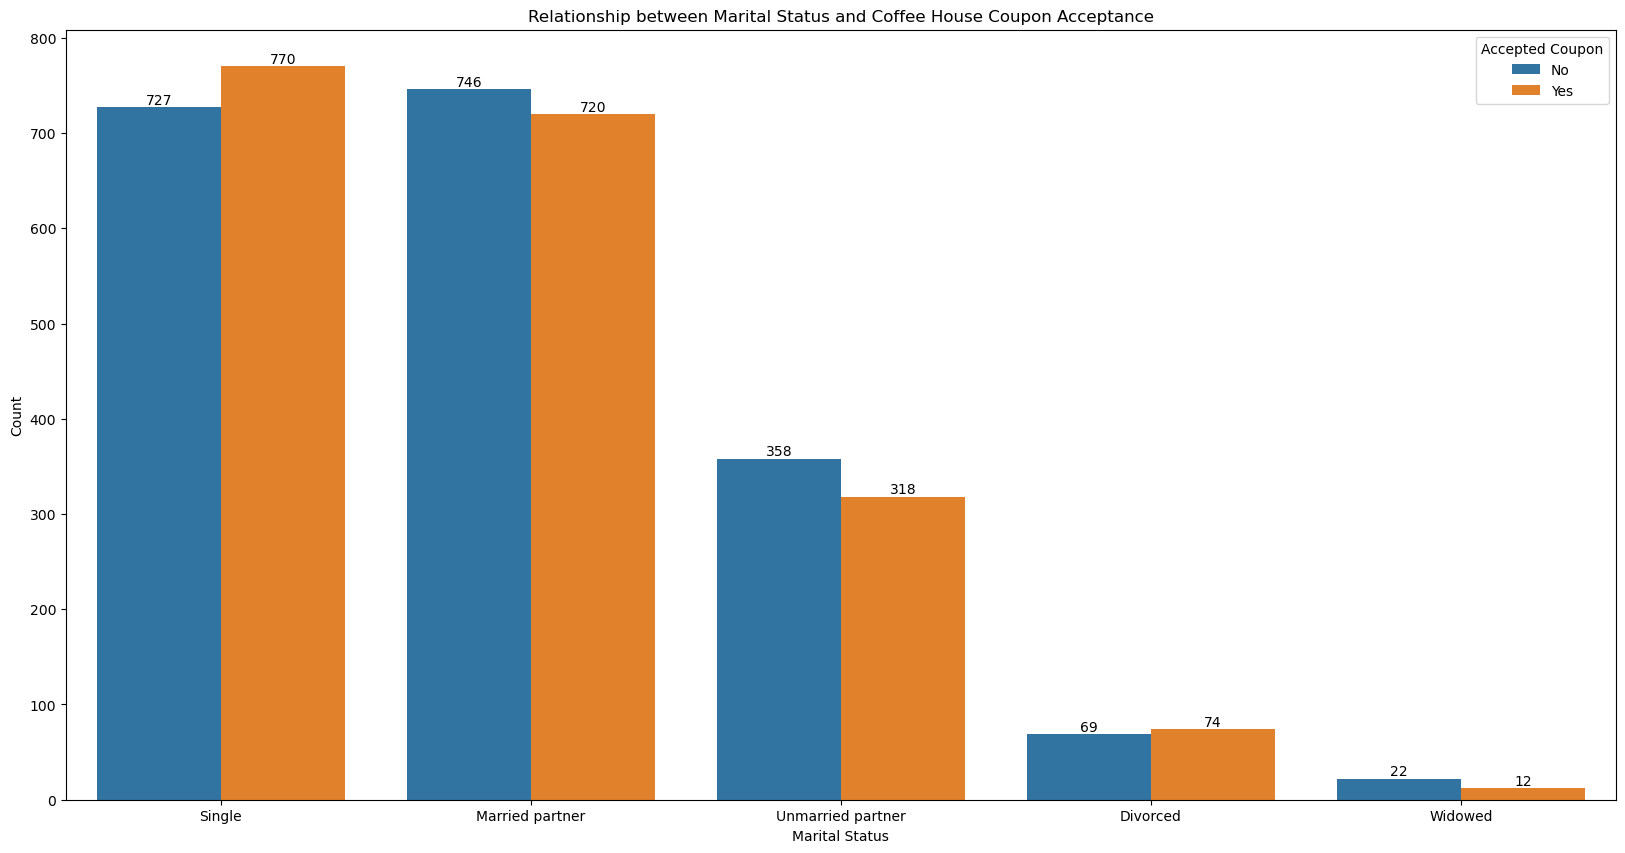

In [92]:
plt.figure(figsize=(20, 10))
martial_status_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'maritalStatus', hue ='Acceptance')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Relationship between Marital Status and Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in martial_status_plot.containers:
    martial_status_plot.bar_label(container)

**Finding:**
- Drivers who are **single** are more likely to accept the coupon compared to other marital status groups.

**4. Explore relationship between number of children driver has and coupon acceptance**

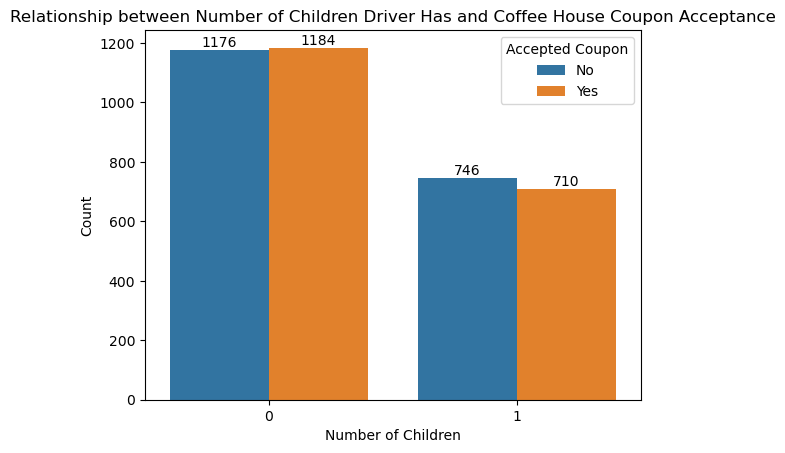

In [93]:
has_children_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'has_children', hue ='Acceptance')
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Relationship between Number of Children Driver Has and Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in has_children_plot.containers:
    has_children_plot.bar_label(container)

**Findings:**
- Number of children a driver has doesn't seem to influence whether a driver will accept the coupon.

**5. Exploring impact of Annual Income on Coupon Acceptance.**

In [94]:
sorted(coffee_coupon_df_copy['income'].unique())

['$100000 or More',
 '$12500 - $24999',
 '$25000 - $37499',
 '$37500 - $49999',
 '$50000 - $62499',
 '$62500 - $74999',
 '$75000 - $87499',
 '$87500 - $99999',
 'Less than $12500']

In [95]:
sorted_income_group = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']

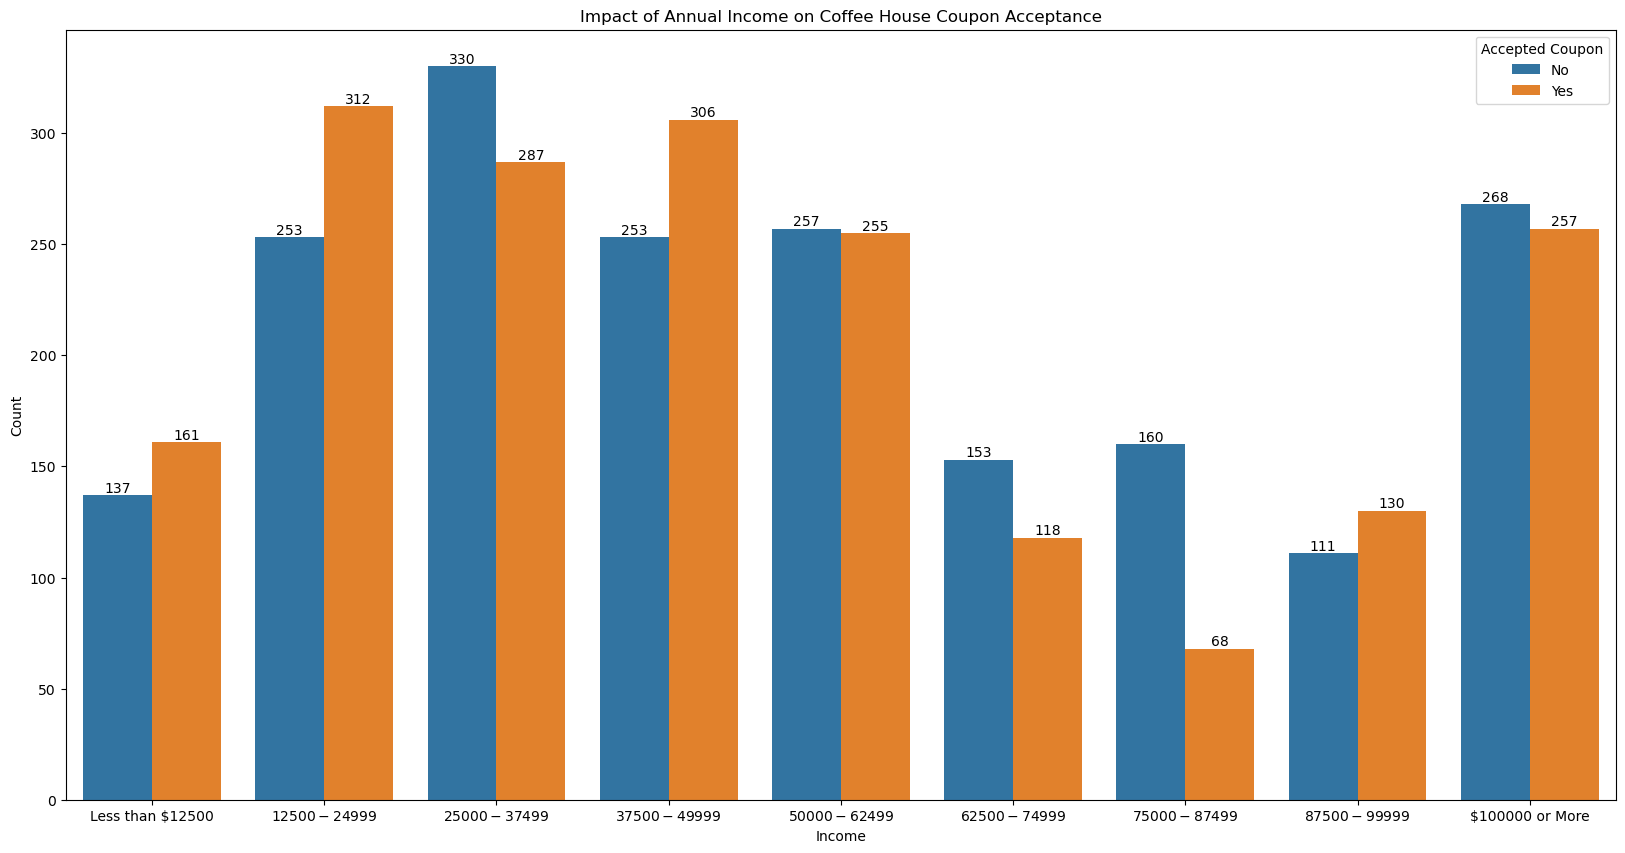

In [96]:
# adjust size to fix labels
plt.figure(figsize=(20, 10))
income_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'income', hue ='Acceptance', order = sorted_income_group)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Impact of Annual Income on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in income_plot.containers:
    income_plot.bar_label(container)

**Finding:**
- There is no direct trend that can be observed between annual income and coupon acceptance.
- Maybe drivers with low income may accept the coupon more

**6. Explore if time of day influences coupon acceptance.**

In [97]:
coffee_coupon_df_copy['time'].unique()

array(['10AM', '2PM', '6PM', '7AM', '10PM'], dtype=object)

In [98]:
sorted_time = ['7AM','10AM', '2PM', '6PM','10PM']

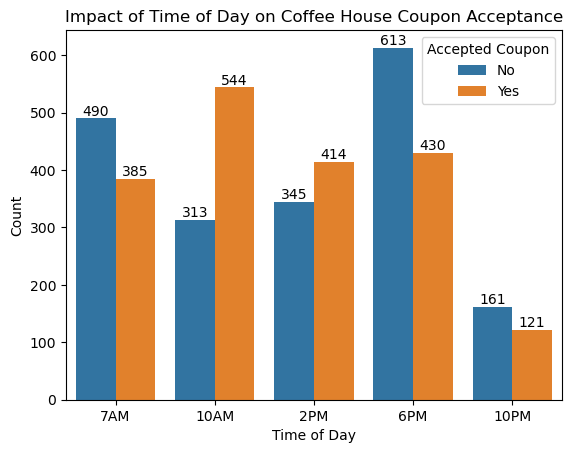

In [99]:
time_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'time', hue ='Acceptance', order = sorted_time)
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.title("Impact of Time of Day on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in time_plot.containers:
    time_plot.bar_label(container)

**Finding:**
- Drivers tend to accept coupon if it's 10AM or 2PM (don't use if it's too early or in the evening)

**7. Explore if the number of times driver goes to Coffee House influences coupon acceptance.**

In [100]:
coffee_coupon_df_copy['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [101]:
sorted_attendance = ['never','less1','1~3','4~8','gt8']

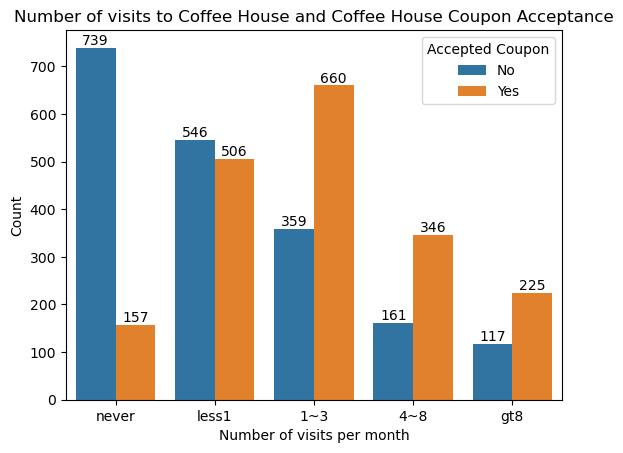

In [102]:
visits_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'CoffeeHouse', hue ='Acceptance', order = sorted_attendance)
plt.xlabel("Number of visits per month")
plt.ylabel("Count")
plt.title("Number of visits to Coffee House and Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in visits_plot.containers:
    visits_plot.bar_label(container)

**Findings:**
- A driver is more likely to accept the Coffee House coupon if he/she visits the Coffee House more than once a month.

**8. Exploring whether driver's occupation influences coupon acceptance.**

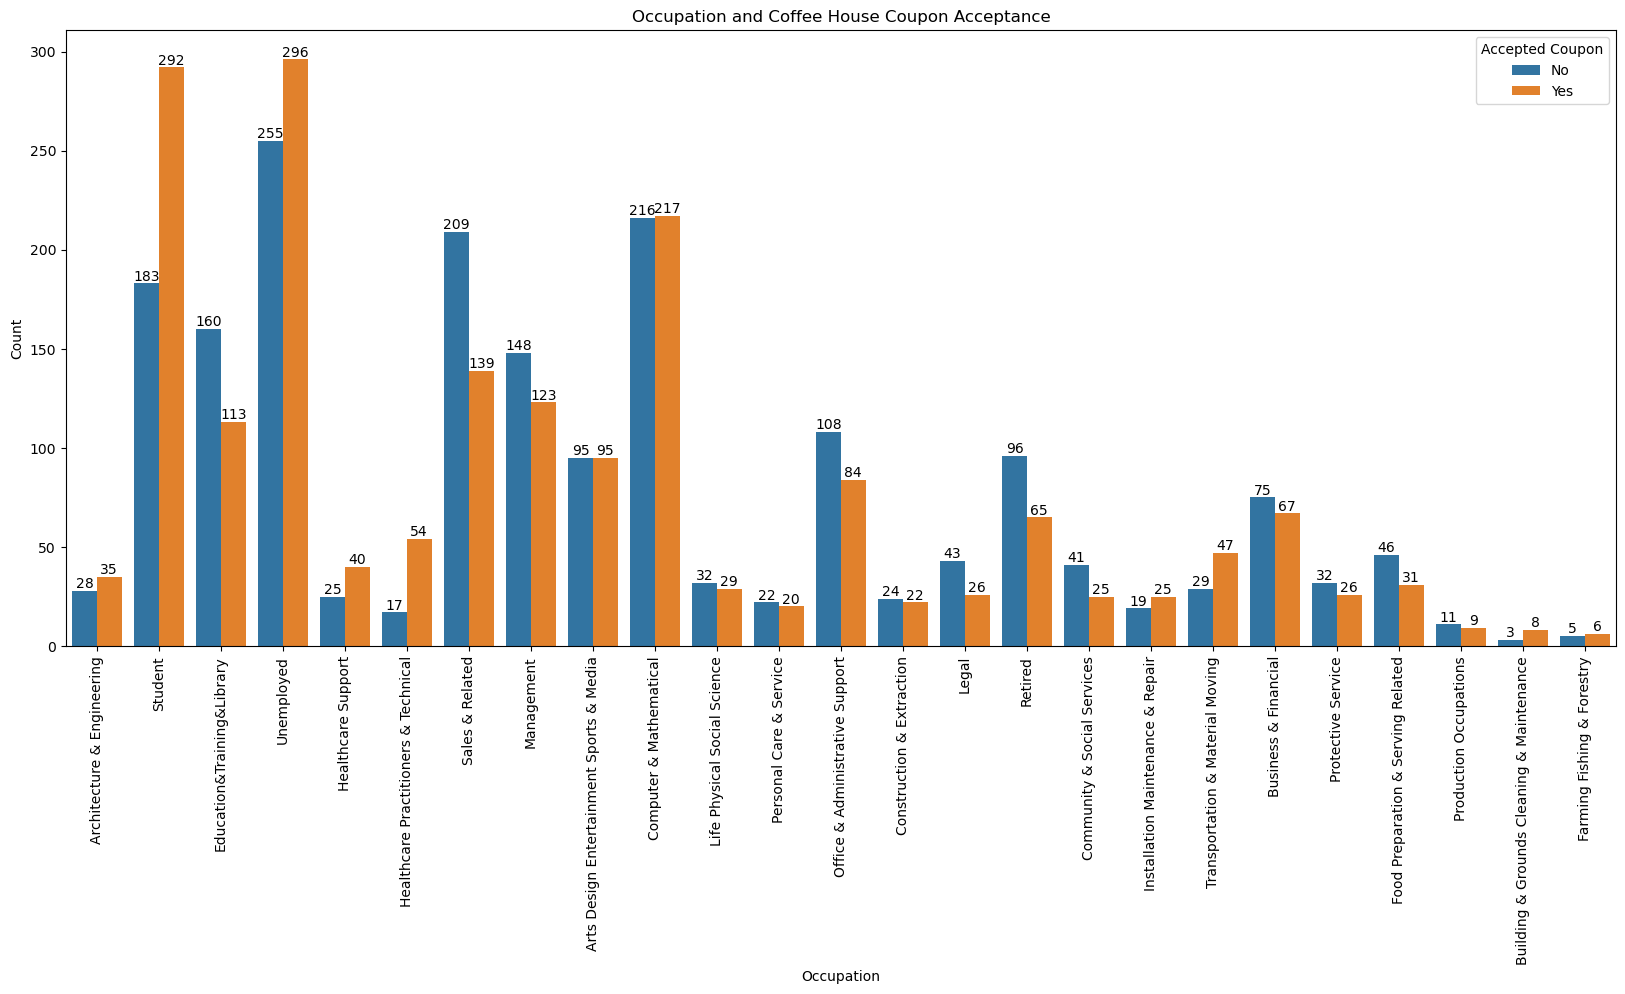

In [103]:
plt.figure(figsize=(20,8))
occupation_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'occupation', hue ='Acceptance')
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Occupation and Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
plt.xticks(rotation=90)

# labeling count for each column
for container in occupation_plot.containers:
    occupation_plot.bar_label(container)

**Finding:**
- Drivers who are students are unemployed are more likely to accept the coffee house coupon.

### Part 3. Exploring Coupon attribute and Acceptance
- coupon expiration

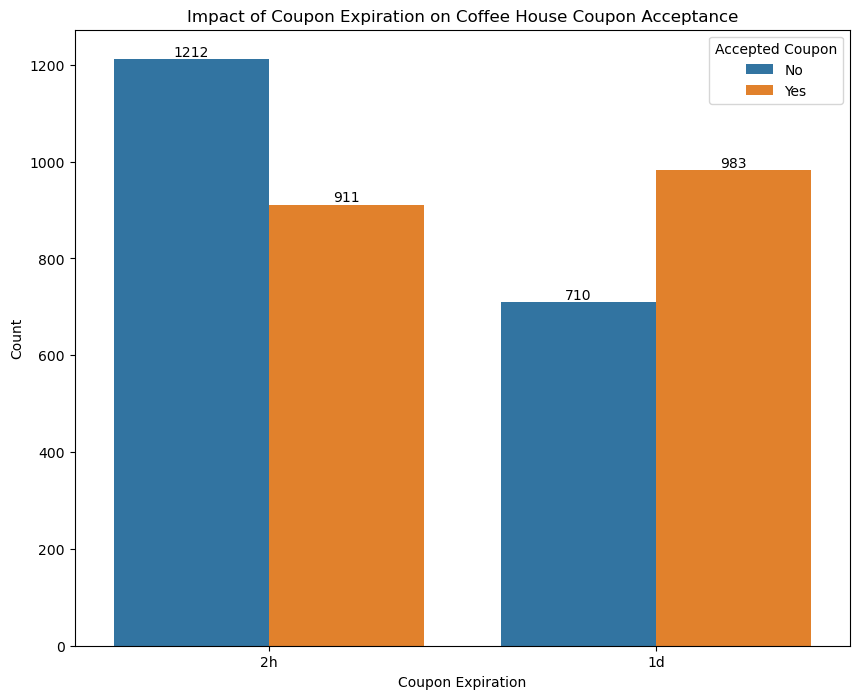

In [104]:
plt.figure(figsize=(10,8))
expiration_plot = sns.countplot(data = coffee_coupon_df_copy, x = 'expiration', hue ='Acceptance')
plt.xlabel("Coupon Expiration")
plt.ylabel("Count")
plt.title("Impact of Coupon Expiration on Coffee House Coupon Acceptance")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])

# labeling count for each column
for container in expiration_plot.containers:
    expiration_plot.bar_label(container)

**Findings:**
- Drivers are more likley to use coupon if it doesn't expire soon (2 hours)
- Possible reason is that drivers have more time to plan when to use the coupon.

## Summary and Key Findings:

Recap: In this section, we tried to determine which characteristics of passengers accept the Coffee House Coupon. Pie charts, bar charts and countplots were the main methods to visualize the data as many of the variables are categorical and not numerical. Here is a list of the characteristics that influence acceptance of coupon:

1. Driver is with Friends
2. Driver has no urgent place to be
3. Driver is single and is in the age groups: below 21, 21 and 26
4. Time of day is 10 am and 2pm
5. Driver frequents Coffee House more than once a month
6. Drivers are students or unemployed
7. Coupon expires after a day.

### Further Exploration:

Based on the key findings above, I want to consider various attributes together. In particular I want to find the acceptance rate for the following:
- goes to coffee house more than once a month and are under the age of 30
- driver is with friends and partner and time of day is 10 am or 2pm

In [105]:
# Checking the df 
coffee_coupon_df_copy

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Acceptance
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,No
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,No
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,4~8,gt8,less1,1,1,0,0,1,0,No
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,4~8,gt8,less1,1,0,0,1,0,0,No
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,0,0,1,0,0,No
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,No


In [106]:
# Creating df for the condition: goes to coffee house more than once a month and are under the age of 30

# drivers who go to coffee house more than once a month
condition_a = ['1~3', 'gt8', '4~8']

# under the age of 30
condition_d = ['21','26','below21']

In [107]:
# Creating filtered df
filtered_coffee1 = coffee_coupon_df_copy.query('CoffeeHouse in @condition_a and age in @condition_d')

In [108]:
filtered_coffee1['CoffeeHouse'].value_counts()

1~3    549
4~8    210
gt8    187
Name: CoffeeHouse, dtype: int64

In [109]:
filtered_coffee1['age'].value_counts()

26         418
21         418
below21    110
Name: age, dtype: int64

In [110]:
filtered_coffee1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 111 to 12631
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           946 non-null    object
 1   passanger             946 non-null    object
 2   weather               946 non-null    object
 3   temperature           946 non-null    int64 
 4   time                  946 non-null    object
 5   coupon                946 non-null    object
 6   expiration            946 non-null    object
 7   gender                946 non-null    object
 8   age                   946 non-null    object
 9   maritalStatus         946 non-null    object
 10  has_children          946 non-null    int64 
 11  education             946 non-null    object
 12  occupation            946 non-null    object
 13  income                946 non-null    object
 14  Bar                   946 non-null    object
 15  CoffeeHouse           946 non-null  

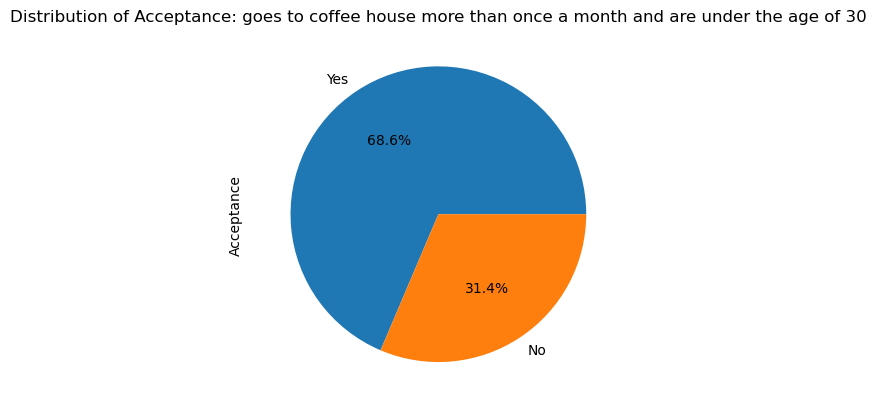

In [111]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_coffee1['Acceptance'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: goes to coffee house more than once a month and are under the age of 30');

**Findings:**
- Acceptance rate for those who go to coffee house more than once a month and are under the age of 30 is **68.6%**.

In [112]:
coffee_coupon_df_copy['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [113]:
# Creating df for the condition: driver is with friends and partner and time of day is 10 am or 2pm

# driver is with friends and partner
condition_g = ['Friend(s)', 'Partner']

# time
condition_h = ['10AM', '2PM']

In [114]:
# Creating filtered df
filtered_coffee2 = coffee_coupon_df_copy.query('passanger in @condition_g and time in @condition_h')

In [115]:
filtered_coffee2['passanger'].value_counts()

Friend(s)    918
Partner      236
Name: passanger, dtype: int64

In [116]:
filtered_coffee2['time'].value_counts()

2PM     682
10AM    472
Name: time, dtype: int64

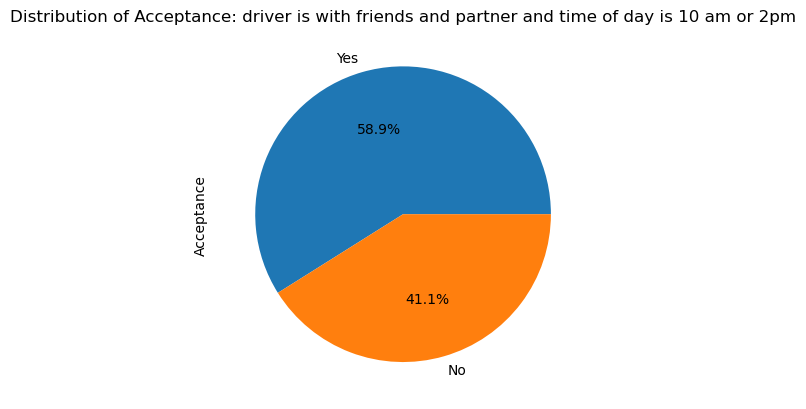

In [117]:
# Calculate and Visualize Acceptance Rate using Pie Chart
filtered_coffee2['Acceptance'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Acceptance: driver is with friends and partner and time of day is 10 am or 2pm');

**Findings:**
- Acceptance rate for those who are with friends and partners and the time of day is 10am or 2pm is **58.9%**.